In [1]:
# Package imports 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
import sklearn.datasets 
import sklearn.linear_model 
import matplotlib 
 
# Display plots inline and change default figure size 
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

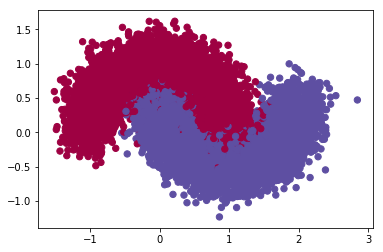

In [2]:
np.random.seed(3) 
X, y = sklearn.datasets.make_moons(10000, noise=0.20) 
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
# Train the logistic rgeression classifier 
clf = sklearn.linear_model.LogisticRegressionCV() 
clf.fit(X, y) 

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [4]:
# Helper function to plot a decision boundary. 
# If you don't fully understand this function don't worry, it just generates the contour plot below. 
def plot_decision_boundary(pred_func): 
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

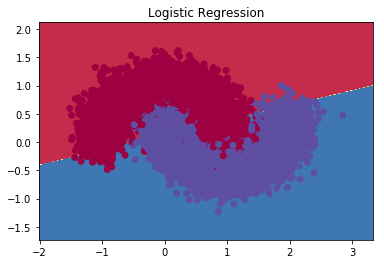

In [5]:
# Plot the decision boundary 
plot_decision_boundary(lambda x: clf.predict(x)) 
plt.title("Logistic Regression") 


In [6]:
# training set size 
num_examples = len(X) 
# input layer dimensionality 
nn_input_dim = 2 
# output layer dimensionality 
nn_output_dim = 2 

# Gradient descent parameters  
epsilon = 0.01 # learning rate for gradient descent 
reg_lambda = 0.01 # regularization strength 

In [7]:
# Helper function to evaluate the total loss on the dataset 
def calculate_loss(model): 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    # Forward propagation to calculate our predictions 
    z1 = X.dot(W1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(W2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    # Calculating the loss 
    corect_logprobs = -np.log(probs[range(num_examples), y]) 
    data_loss = np.sum(corect_logprobs) 
    # Add regulatization term to loss (optional) 
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2))) 
    return 1./num_examples * data_loss 

In [8]:
# Helper function to predict an output (0 or 1) 
def predict(model, x): 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    # Forward propagation 
    z1 = x.dot(W1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(W2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    return np.argmax(probs, axis=1) 


In [9]:
# This function learns parameters for the neural network and returns the model. 
# - nn_hdim: Number of nodes in the hidden layer 
# - num_passes: Number of passes through the training data for gradient descent 
# - print_loss: If True, print the loss every 1000 iterations 
def build_model(nn_hdim, num_passes=20000, print_loss=False): 
 
    # Initialize the parameters to random values. We need to learn these. 
    np.random.seed(0) 
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim) 
    b1 = np.zeros((1, nn_hdim)) 
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) 
    b2 = np.zeros((1, nn_output_dim)) 
 
    # This is what we return at the end 
    model = {} 
 
    # Gradient descent. For each batch... 
    for i in range(0, num_passes): 
 
        # Forward propagation 
        z1 = X.dot(W1) + b1 
        a1 = np.tanh(z1) 
        z2 = a1.dot(W2) + b2 
        exp_scores = np.exp(z2) 
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
 
        # Backpropagation 
        delta3 = probs 
        delta3[range(num_examples), y] -= 1 
        dW2 = (a1.T).dot(delta3) 
        db2 = np.sum(delta3, axis=0, keepdims=True) 
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2)) 
        dW1 = np.dot(X.T, delta2) 
        db1 = np.sum(delta2, axis=0) 
 
        # Add regularization terms (b1 and b2 don't have regularization terms) 
        dW2 += reg_lambda * W2 
        dW1 += reg_lambda * W1 
 
        # Gradient descent parameter update 
        W1 += -epsilon * dW1 
        b1 += -epsilon * db1 
        W2 += -epsilon * dW2 
        b2 += -epsilon * db2 
 
        # Assign new parameters to the model 
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2} 
 
        # Optionally print the loss. 
        # This is expensive because it uses the whole dataset, so we don't want to do it too often. 
        if print_loss and i % 1000 == 0: 
          print("Loss after iteration %i: %f" %(i, calculate_loss(model))) 
 
    return model 


In [10]:
# Build a model with a 3-dimensional hidden layer 
model = build_model(3, print_loss=True)

Loss after iteration 0: 4.936898
Loss after iteration 1000: 12.855021
Loss after iteration 2000: 14.471731
Loss after iteration 3000: 16.485460
Loss after iteration 4000: 10.200518
Loss after iteration 5000: 13.219069
Loss after iteration 6000: 31.238465
Loss after iteration 7000: 13.270355
Loss after iteration 8000: 2.692318
Loss after iteration 9000: 15.215834
Loss after iteration 10000: 15.068974
Loss after iteration 11000: 14.736422
Loss after iteration 12000: 16.293796
Loss after iteration 13000: 29.577047
Loss after iteration 14000: 10.638391
Loss after iteration 15000: 14.178491
Loss after iteration 16000: 13.094639
Loss after iteration 17000: 11.714369
Loss after iteration 18000: 11.130126
Loss after iteration 19000: 16.099342


Text(0.5,1,'Decision Boundary for hidden layer size 3')

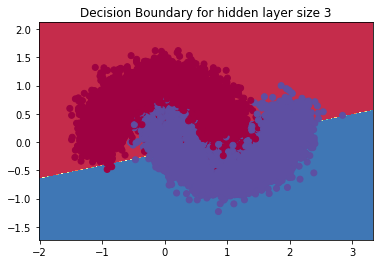

In [11]:
# Plot the decision boundary 
plot_decision_boundary(lambda x: predict(model, x)) 
plt.title("Decision Boundary for hidden layer size 3") 

/home/kumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


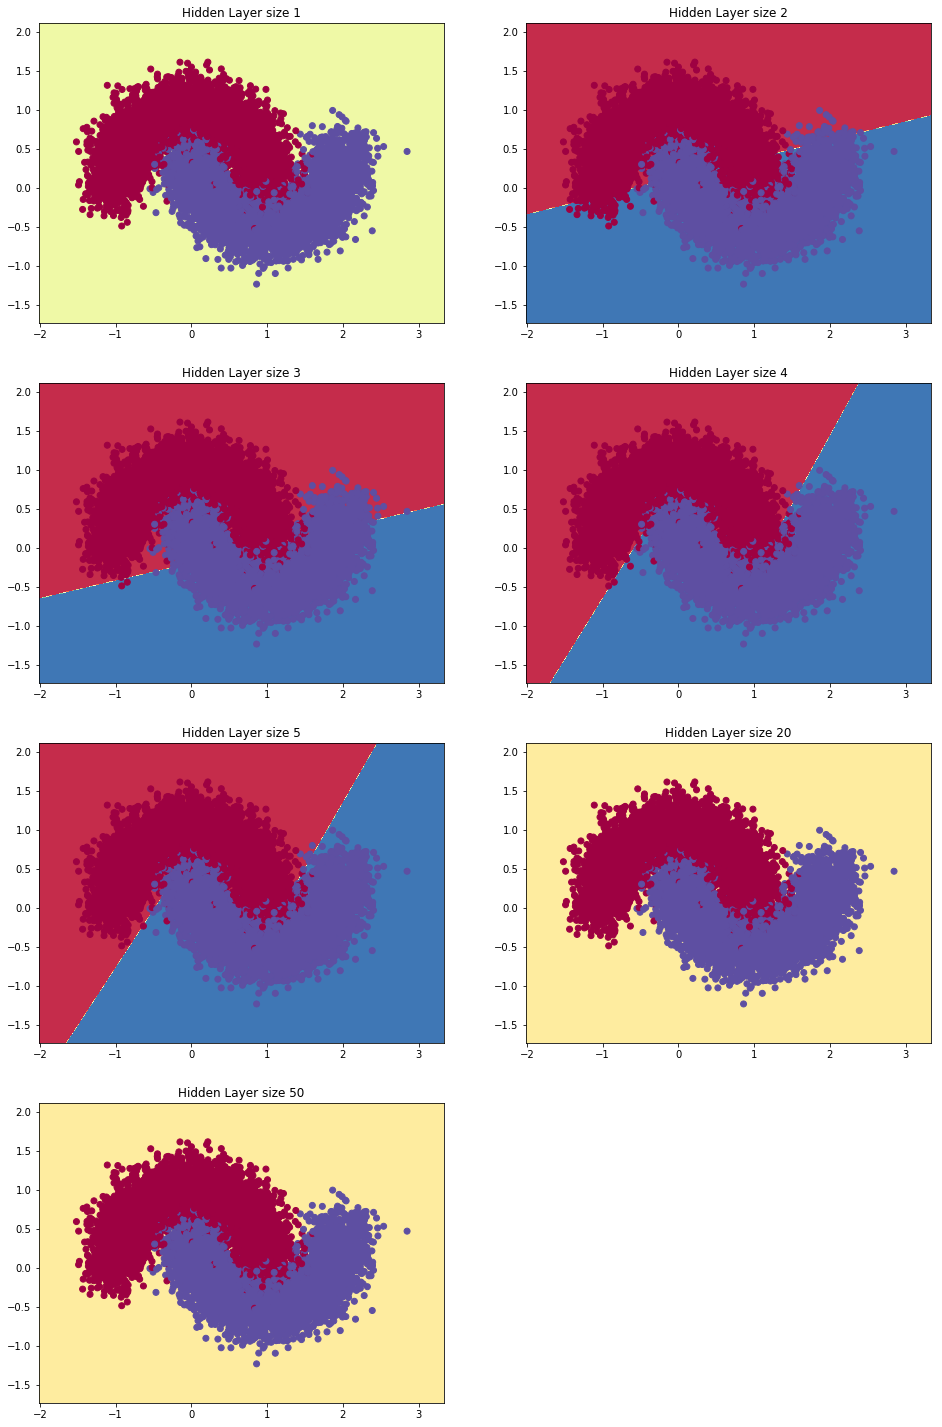

In [12]:
plt.figure(figsize=(16, 32)) 
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50] 
for i, nn_hdim in enumerate(hidden_layer_dimensions): 
    plt.subplot(5, 2, i+1) 
    plt.title('Hidden Layer size %d' % nn_hdim) 
    model = build_model(nn_hdim) 
    plot_decision_boundary(lambda x: predict(model, x)) 
plt.show()